## Positive Autocorrelation Example: Exchange Rates

* Use Daily Yien/Dollar exchange rates in DataFrame df from:
https://fred.stlouisfed.org/series/DEXJPUS

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('yien_doll_exchange.csv')
df.head()

,DATE,DEXJPUS
0,2010-02-08,89.3200
1,2010-02-09,89.4500
2,2010-02-10,89.8800
3,2010-02-11,89.8200
4,2010-02-12,90.0000


In [3]:
# Convert index to datetime
df.set_index(pd.to_datetime(df.DATE), inplace=True)
df.head()

,DATE,DEXJPUS
DATE,,
2010-02-08,2010-02-08,89.3200
2010-02-09,2010-02-09,89.4500
2010-02-10,2010-02-10,89.8800
2010-02-11,2010-02-11,89.8200
2010-02-12,2010-02-12,90.0000


In [4]:
df.drop(['DATE'], axis=1, inplace=True)
df.head()

,DEXJPUS
DATE,
2010-02-08,89.3200
2010-02-09,89.4500
2010-02-10,89.8800
2010-02-11,89.8200
2010-02-12,90.0000


In [7]:
# Drop inconsistent data
df = df.loc[df['DEXJPUS'] != '.']

In [8]:
# Downsample from daily to monthly data
df = df.resample(rule='M', how='last')
df.head()

/home/w/Desktop/environments/flex/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  


,DEXJPUS
DATE,
2010-02-28,88.8400
2010-03-31,93.4000
2010-04-30,94.2400
2010-05-31,90.8100
2010-06-30,88.4900


In [10]:
# Convert to float data
df['DEXJPUS'] = df['DEXJPUS'].astype(float)
df['DEXJPUS'].head()

DATE
2010-02-28    88.84
2010-03-31    93.40
2010-04-30    94.24
2010-05-31    90.81
2010-06-30    88.49
Freq: M, Name: DEXJPUS, dtype: float64

In [13]:
# Compute returns from prices
df['Return'] = df['DEXJPUS'].pct_change()
df.dropna(inplace=True)
df['Return'].head()

DATE
2010-03-31    0.051328
2010-04-30    0.008994
2010-05-31   -0.036396
2010-06-30   -0.025548
2010-07-31   -0.023279
Freq: M, Name: Return, dtype: float64

In [18]:
# Compute autocorrelation
autocorrelation = df['Return'].autocorr()
print('The autocorrelation is :', autocorrelation)

# Therefore, the series exhibits some momentum.

The autocorrelation is : 0.11207641235493734


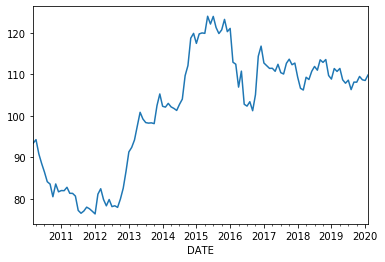

In [17]:
df['DEXJPUS'].plot()